<a href="https://colab.research.google.com/github/Mfuseini10/CreditCard-Fraud-Detection-Machine-Learning-Project/blob/main/EDA_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Analysis of Stock Prices**

In [2]:
#import neccessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#mount drive to import data directly from google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Stock analysis/Stock_Price_Action_Data.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Adj_Close,Volume
0,AAPL,2023-02-07,150.64,155.23,150.64,154.65,154.41,83322600.0
1,AAPL,2023-02-08,153.88,154.58,151.17,151.92,151.69,64120100.0
2,AAPL,2023-02-09,153.78,154.33,150.42,150.87,150.64,56007100.0
3,AAPL,2023-02-10,149.46,151.34,149.22,151.01,151.01,57450700.0
4,AAPL,2023-02-13,150.95,154.26,150.92,153.85,153.85,62199000.0


In [5]:
#Checking for data types
df.dtypes

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume       float64
dtype: object

In [6]:
#change date column to datatime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume              float64
dtype: object

In [7]:
#check for columns and rows
df.shape
print("The dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]))

The dataset has 248 rows and 8 columns.


In [8]:
#How many Tickers are in the dataset
df['Ticker'].nunique()

4

In [9]:
ticker_sys = df['Ticker'].unique()
print(ticker_sys)
print("The dataset contains the price action data of four companies, Apple - AAPL, Microsoft - MFST, Netflix - NFLX, and Google - GOOG.")

['AAPL' 'MSFT' 'NFLX' 'GOOG']
The dataset contains the price action data of four companies, Apple - AAPL, Microsoft - MFST, Netflix - NFLX, and Google - GOOG.


## **Checking the Statistical Metrics of our data**

In [10]:
#summary
df.set_index('Date')

,Ticker,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.64,155.23,150.64,154.65,154.41,83322600.0
2023-02-08,AAPL,153.88,154.58,151.17,151.92,151.69,64120100.0
2023-02-09,AAPL,153.78,154.33,150.42,150.87,150.64,56007100.0
2023-02-10,AAPL,149.46,151.34,149.22,151.01,151.01,57450700.0
2023-02-13,AAPL,150.95,154.26,150.92,153.85,153.85,62199000.0
...,...,...,...,...,...,...,...
2023-05-01,GOOG,107.72,108.68,107.50,107.71,107.71,20926300.0
2023-05-02,GOOG,107.66,107.73,104.50,105.98,105.98,20343100.0
2023-05-03,GOOG,106.22,108.13,105.62,106.12,106.12,17116300.0


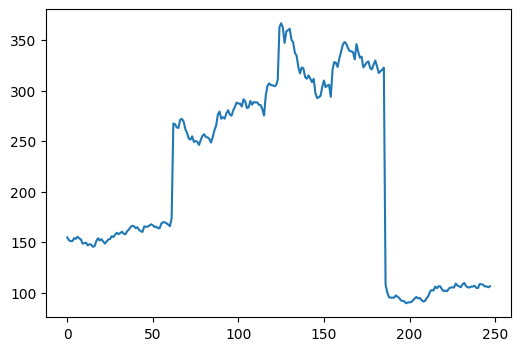

In [11]:
#sock data line graph
plt.figure(figsize = (6,4))
df['Close'].plot()
plt.show()

In [12]:
#creatinf a new column to check prices difference
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
df.head()

,Ticker,Date,Open,High,Low,Close,Adj_Close,Volume,PriceDiff
0,AAPL,2023-02-07,150.64,155.23,150.64,154.65,154.41,83322600.0,-2.73
1,AAPL,2023-02-08,153.88,154.58,151.17,151.92,151.69,64120100.0,-1.05
2,AAPL,2023-02-09,153.78,154.33,150.42,150.87,150.64,56007100.0,0.14
3,AAPL,2023-02-10,149.46,151.34,149.22,151.01,151.01,57450700.0,2.84
4,AAPL,2023-02-13,150.95,154.26,150.92,153.85,153.85,62199000.0,-0.65


In [13]:
#calculating the percentage change (return)
df['Return'] = df['PriceDiff']/df['Close']
df.head()

,Ticker,Date,Open,High,Low,Close,Adj_Close,Volume,PriceDiff,Return
0,AAPL,2023-02-07,150.64,155.23,150.64,154.65,154.41,83322600.0,-2.73,-0.017653
1,AAPL,2023-02-08,153.88,154.58,151.17,151.92,151.69,64120100.0,-1.05,-0.006912
2,AAPL,2023-02-09,153.78,154.33,150.42,150.87,150.64,56007100.0,0.14,0.000928
3,AAPL,2023-02-10,149.46,151.34,149.22,151.01,151.01,57450700.0,2.84,0.018807
4,AAPL,2023-02-13,150.95,154.26,150.92,153.85,153.85,62199000.0,-0.65,-0.004225


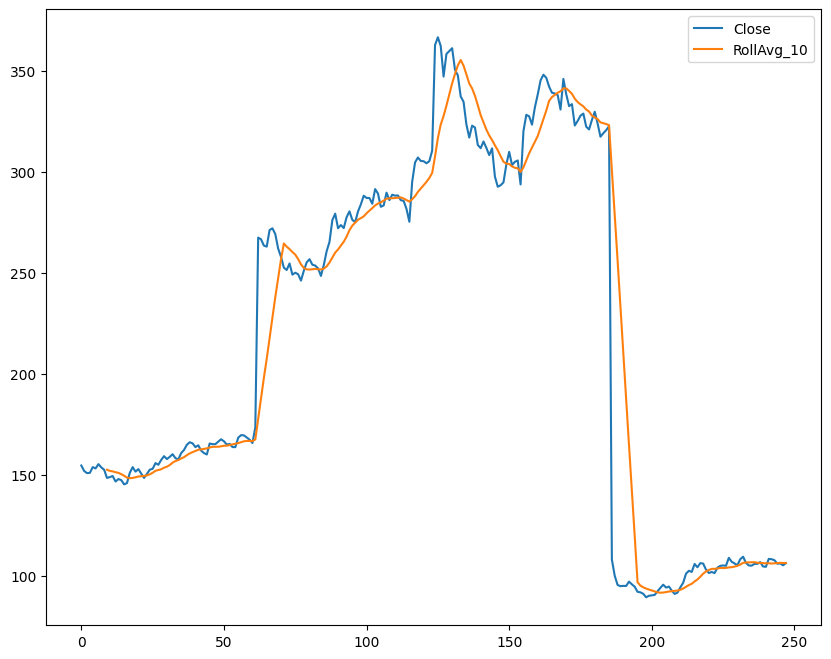

In [15]:
#Moving averages for 10 days
df['RollAvg10'] = df['Close'].rolling(10).mean()

#ploting a graph
plt.figure(figsize = (10,8))
df['Close'].plot(label = 'Close')
df['RollAvg10'].plot(label = 'RollAvg_10')
plt.legend()
plt.show()

In [16]:
#